In [44]:
import pandas as pd
import numpy as np


# import data

In [3]:
from sklearn.datasets import load_boston
data = load_boston() 
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())
 #target=price

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


In [7]:
print(df.shape)
print(df.describe())

(506, 14)
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861

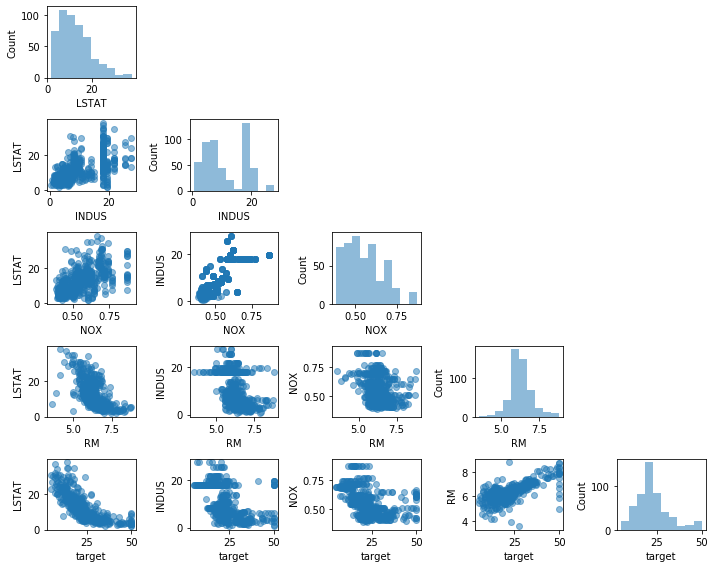

In [18]:
#visualizing analysis
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['LSTAT','INDUS','NOX','RM','target'] 
scatterplotmatrix(df[cols].values, 
                 figsize=(10,8),
                 names=cols,
                 alpha=0.5) #correlation between the features
plt.tight_layout()
plt.show()


In [11]:
#pip install mlxtend

     |████████████████████████████████| 1.3 MB 4.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/hanacho/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


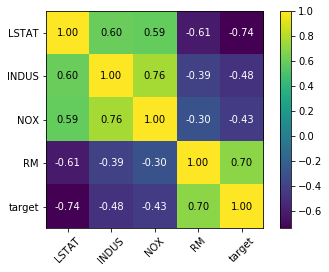

In [19]:
#correlationship between the features 
from mlxtend.plotting import heatmap
import numpy as np

cm = np.corrcoef(df[cols].values.T)
cm
hm = heatmap(cm,
            row_names=cols,
            column_names=cols)
plt.show()

# linear regression modeling

## RM vs MEDV

In [22]:
#define X,y 
X = df[['RM']].values
y = df[['target']].values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_std, y_std) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#draw scatter plot and lin regression function
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X,model.predict(X), color='black',lw=2)
    return None

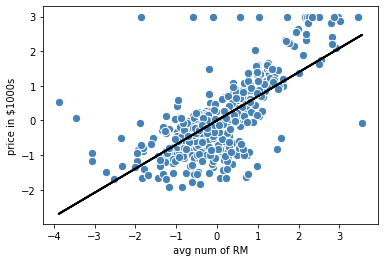

In [31]:
lin_regplot(X_std, y_std, lr) 
plt.xlabel('avg num of RM')
plt.ylabel('price in $1000s')
plt.show()

In [32]:
accuracy = lr.score(X_std, y_std)
accuracy

0.483525455991334

In [33]:
lr.coef_

array([[0.69535995]])

In [36]:
#train test split
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values 
y = df['target'].values 

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train) 
y_test_pred = lm.predict(X_test)  

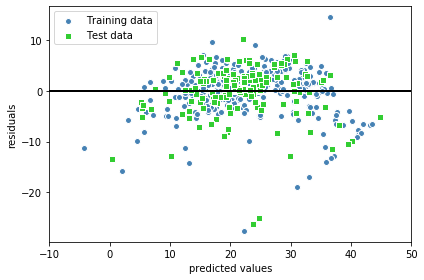

In [39]:
#residual plot to pred lin model
#show errors. some outliers captured

plt.scatter(y_train_pred, y_train_pred - y_train, #diff between real and predict values 
           c='steelblue', marker='o', edgecolors='white',
           label='Training data') 
plt.scatter(y_test_pred, y_test_pred - y_test,
           c='limegreen', marker='s', edgecolors='white',
           label='Test data')

plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10,50])
plt.tight_layout()
plt.show() 

In [42]:
#Mean squared error MSE for evaluation
from sklearn.metrics import mean_squared_error
print('train MSE: %.3f, test MSE: %.3f' % (
    mean_squared_error (y_train, y_train_pred),
     mean_squared_error(y_test, y_test_pred)))

#model is overfitted for train dataset

train MSE: 19.958, test MSE: 27.196


In [43]:
#use R^2 for model evaluation
from sklearn.metrics import r2_score
print('train r^2: %.3f, test r^2: %.3f' % (
    r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))

#perfect if R2=1, MSE=0

train r^2: 0.765, test r^2: 0.673


## LSTAT vs MEDV 

In [ ]:
#linear regression model for LSTAT(lower status) vs MEDV (medium price, $1000 range) 

In [46]:
X = df[['LSTAT']].values
y = df['target'].values

In [47]:
reg = LinearRegression() 

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
#create polynomial features 
quad = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3) 

X_quad = quad.fit_transform(X)
X_cubic = cubic.fit_transform(X)  

In [55]:
#feature range 
X_fit = np.arange(X.min(),
                X.max(),1)[:,np.newaxis]

reg = reg.fit(X, y) 
y_lin_fit = reg.predict(X_fit)  
lin_r2 = r2_score(y, reg.predict(X))

reg = reg.fit(X_quad, y)
y_quad_fit = reg.predict(quad.fit_transform(X_fit))
quad_r2 = r2_score(y, reg.predict(X_quad))

reg = reg.fit(X_cubic, y)
y_cubic_fit = reg.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, reg.predict(X_cubic))

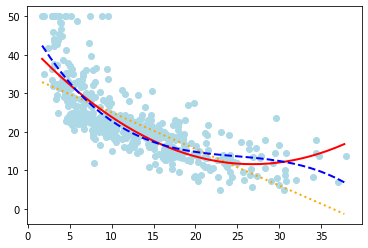

In [66]:
#visualize 
#plot train and test training sets
plt.scatter(X,y, label='training points',color='lightblue')

#linear reg plot
plt.plot(X_fit, y_lin_fit,
        label='Linear (d=1), $R^2=%.2f$' %lin_r2,
        color='orange',
        lw=2,
        linestyle=':')
#quad reg plot
plt.plot(X_fit, y_quad_fit,
        label='quad (d=2), $R^2=%.2f$' %quad_r2,
        color='red',
        lw=2,
        linestyle='-')

#cubic reg plot
plt.plot(X_fit, y_cubic_fit,
        label='cubic (d=3), $R^2=%.2f$' %cubic_r2,
        color='blue',
        lw=2,
        linestyle='--') 